In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

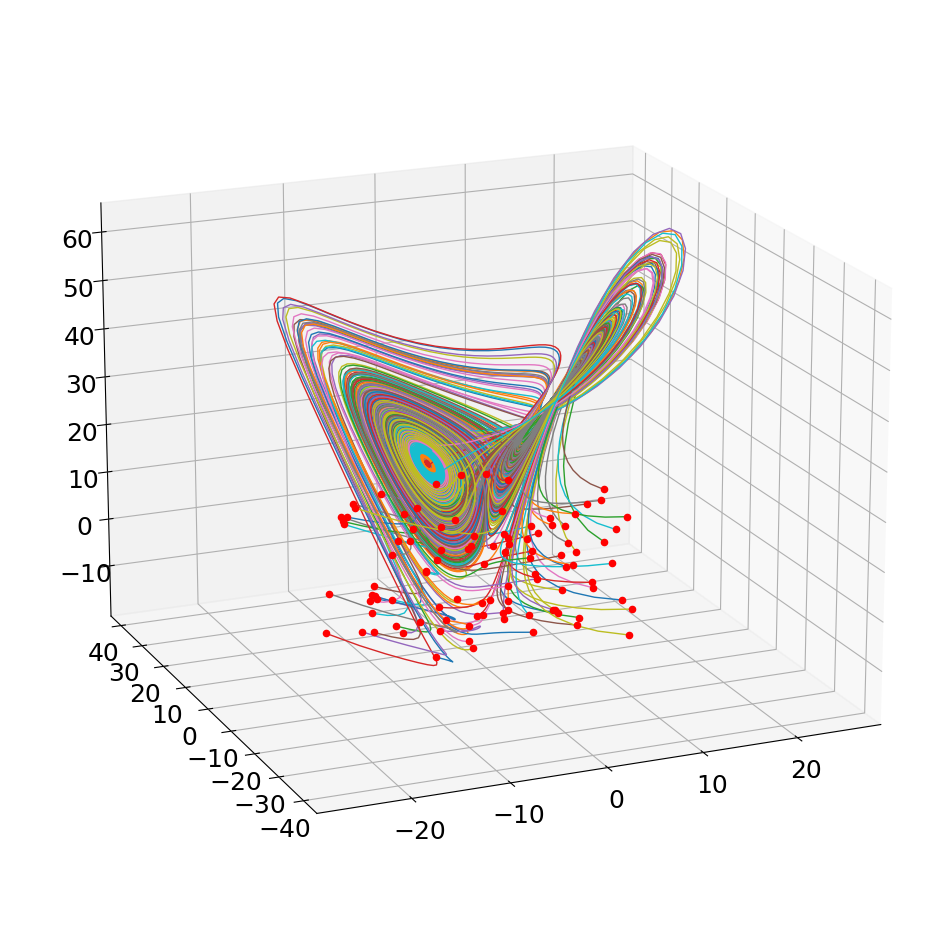

In [2]:
## Simulate the Lorenz System

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_dim, output_dim=3):
        super(NeuralNet, self).__init__()
        
        # Define custom activation functions
        self.logsig = lambda x: 1/(1+torch.exp(-x))
        self.radbas = lambda x: torch.exp(-x.pow(2))
        self.linear = lambda x: x
        
        # Layers
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, output_dim)

    def forward(self, x):
        x = self.logsig(self.fc1(x))
        x = self.radbas(self.fc2(x))
        x = self.linear(self.fc3(x))  # Linear activation for the last layer
        return x

# Convert your numpy data to PyTorch tensors
nn_input_torch = torch.tensor(nn_input, dtype=torch.float32)
nn_output_torch = torch.tensor(nn_output, dtype=torch.float32)

# Initialize the model and optimizer
input_dim = nn_input.shape[1]
model = NeuralNet(input_dim)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Note: You may need to adjust the learning rate
criterion = nn.CrossEntropyLoss()

# Training loop
epochs = 30
for epoch in range(epochs):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward + Backward + Optimize
    outputs = model(nn_input_torch)
    loss = criterion(outputs, torch.argmax(nn_output_torch, dim=1))
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


Epoch 1/30, Loss: 1.2763285636901855
Epoch 2/30, Loss: 1.205248475074768
Epoch 3/30, Loss: 1.0783894062042236
Epoch 4/30, Loss: 0.9163364171981812
Epoch 5/30, Loss: 0.7421817779541016
Epoch 6/30, Loss: 0.5774017572402954
Epoch 7/30, Loss: 0.4372531771659851
Epoch 8/30, Loss: 0.3282318711280823
Epoch 9/30, Loss: 0.249174565076828
Epoch 10/30, Loss: 0.19469650089740753
Epoch 11/30, Loss: 0.15844303369522095
Epoch 12/30, Loss: 0.1348896324634552
Epoch 13/30, Loss: 0.1198749914765358
Epoch 14/30, Loss: 0.11049258708953857
Epoch 15/30, Loss: 0.10478989034891129
Epoch 16/30, Loss: 0.10147886723279953
Epoch 17/30, Loss: 0.09971505403518677
Epoch 18/30, Loss: 0.09894459694623947
Epoch 19/30, Loss: 0.09880293905735016
Epoch 20/30, Loss: 0.0990491434931755
Epoch 21/30, Loss: 0.09952335804700851
Epoch 22/30, Loss: 0.10011952370405197
Epoch 23/30, Loss: 0.1007673367857933
Epoch 24/30, Loss: 0.10142064839601517
Epoch 25/30, Loss: 0.10204967856407166
Epoch 26/30, Loss: 0.10263566672801971
Epoch 27/3

In [4]:
nn_input.shape

(80000, 3)